In [1]:
# Import all necessary libraries

import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

In [2]:
# Load the combined dataset
df = dd.read_csv("combined_file.csv", parse_dates=True, infer_datetime_format=True)

C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:640: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


In [3]:
# Load the combined dataset without 'infer_datetime_format'
df = dd.read_csv("combined_file.csv", parse_dates=True)

In [4]:
# Convert Dask DataFrame to Pandas DataFrame for analysis
df_sample = df.sample(frac=0.1).compute()  # Sampling 10% to avoid memory issues

C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\sandh\anaconda3\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, 

In [5]:
# Identify and convert datetime columns
for col in df_sample.select_dtypes(include=["object"]).columns:
    try:
        df_sample[col] = pd.to_datetime(df_sample[col])
        print(f"Converted {col} to datetime.")
    except Exception as e:
        print(f"Could not convert {col} to datetime: {e}")

Converted tpep_pickup_datetime to datetime.
Converted tpep_dropoff_datetime to datetime.
Could not convert store_and_fwd_flag to datetime: Unknown datetime string format, unable to parse: N, at position 0


C:\Users\sandh\AppData\Local\Temp\ipykernel_21992\2576766535.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sample[col] = pd.to_datetime(df_sample[col])


In [6]:
# Display basic info
print("\nDataset Overview:")
print(df_sample.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 1382830 entries, 451419 to 557297
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1382830 non-null  int64         
 1   VendorID               1382830 non-null  int64         
 2   tpep_pickup_datetime   1382830 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  1382830 non-null  datetime64[ns]
 4   passenger_count        1240271 non-null  float64       
 5   trip_distance          1382830 non-null  float64       
 6   RatecodeID             1240271 non-null  float64       
 7   store_and_fwd_flag     1240271 non-null  object        
 8   PULocationID           1382830 non-null  int64         
 9   DOLocationID           1382830 non-null  int64         
 10  payment_type           1382830 non-null  int64         
 11  fare_amount            1382830 non-null  float64       
 12  extra     

In [7]:
# Check for missing values
missing_values = df_sample.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
passenger_count         142559
RatecodeID              142559
store_and_fwd_flag      142559
congestion_surcharge    142559
Airport_fee             142559
dtype: int64


In [8]:
# Summary statistics (only for numerical columns)
print("\nSummary Statistics:")
print(df_sample.describe())


Summary Statistics:
         Unnamed: 0      VendorID           tpep_pickup_datetime  \
count  1.382830e+06  1.382830e+06                        1382830   
mean   1.739129e+06  1.757782e+00  2024-04-03 01:03:29.314598656   
min    1.000000e+00  1.000000e+00            2009-01-01 00:02:13   
25%    8.642162e+05  2.000000e+00     2024-03-05 09:01:21.500000   
50%    1.728311e+06  2.000000e+00            2024-04-03 19:04:26   
75%    2.592660e+06  2.000000e+00  2024-05-03 06:49:35.249999872   
max    3.723828e+06  6.000000e+00            2024-06-01 23:54:14   
std    1.015423e+06  4.300434e-01                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        1382830     1.240271e+06   1.382830e+06   
mean   2024-04-03 01:20:29.185681408     1.330793e+00   4.850324e+00   
min              2009-01-01 00:48:28     0.000000e+00   0.000000e+00   
25%              2024-03-05 09:20:02     1.000000e+00   1.020000e+00   
50%   

In [9]:
# Check data types
print("\nData Types:")
print(df_sample.dtypes)


Data Types:
Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object


In [10]:
# Select only numerical columns for visualization
numerical_cols = df_sample.select_dtypes(include=["int64", "float64"]).columns

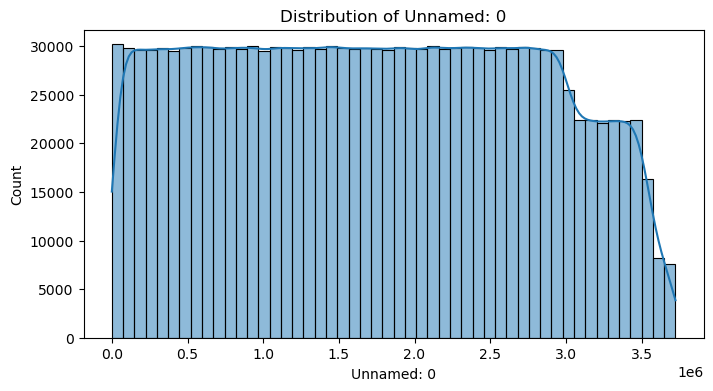

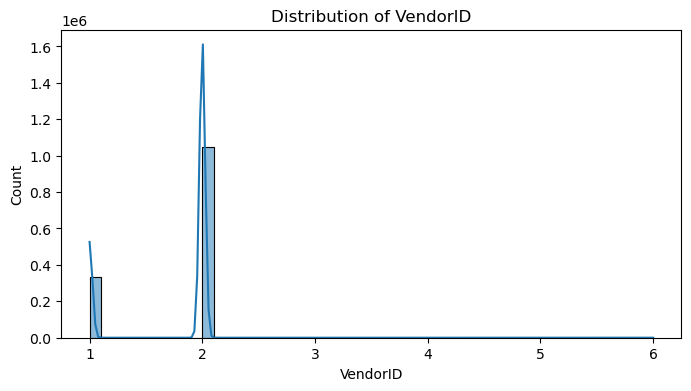

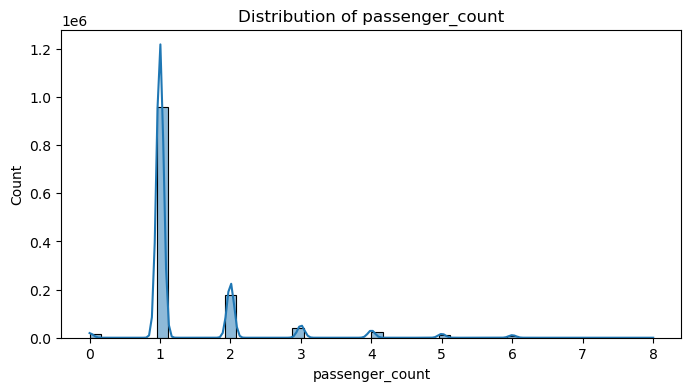

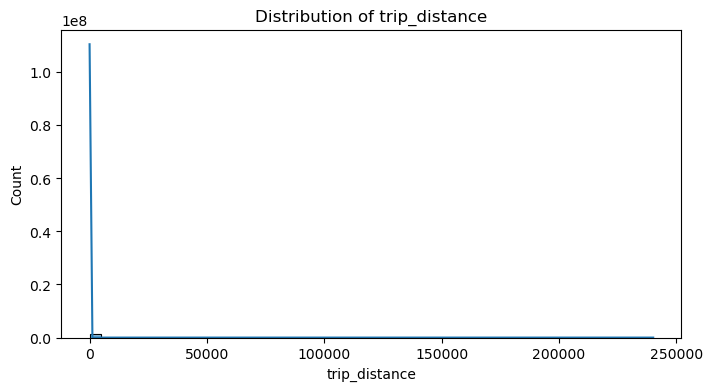

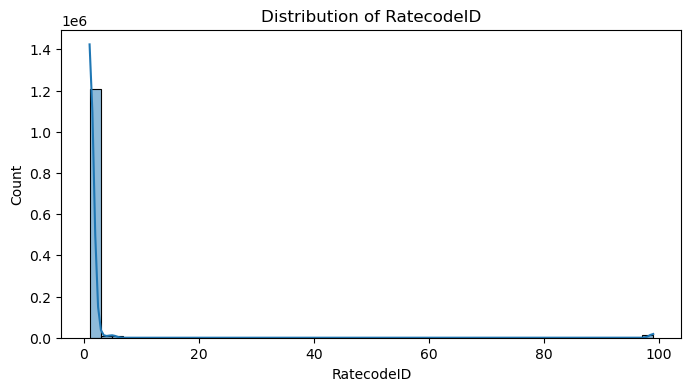

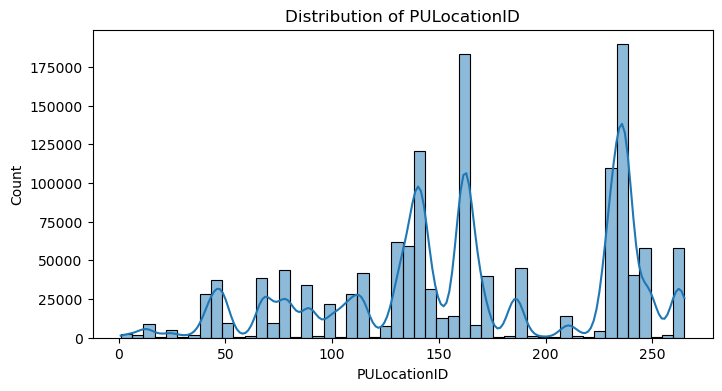

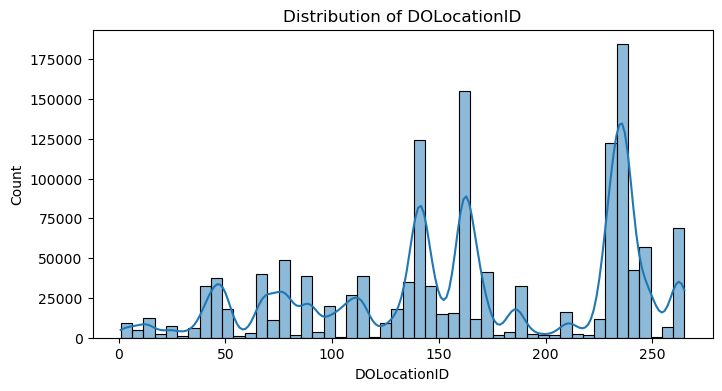

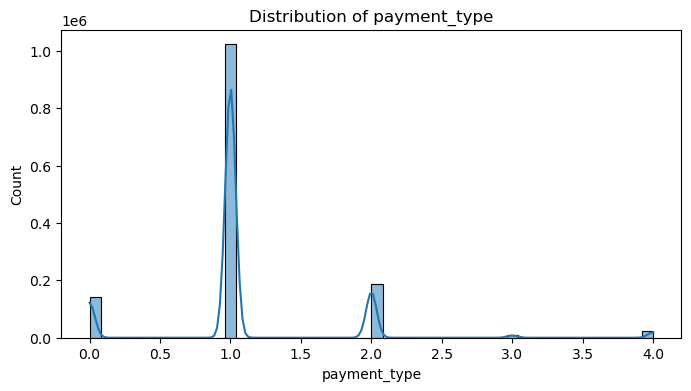

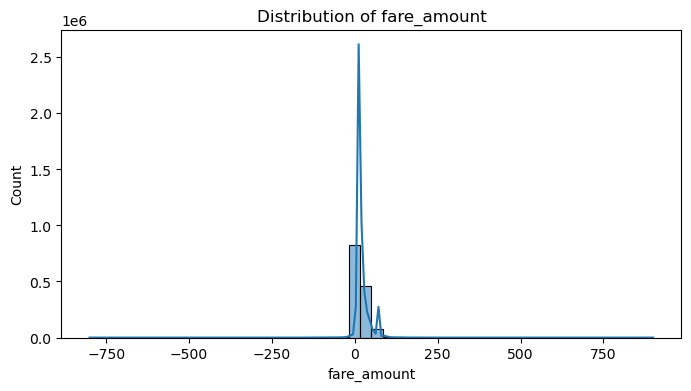

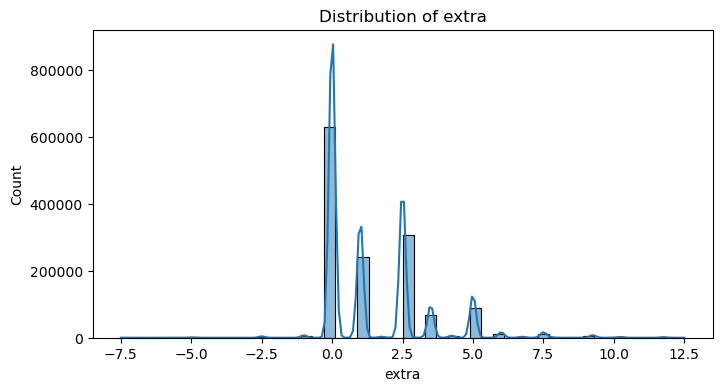

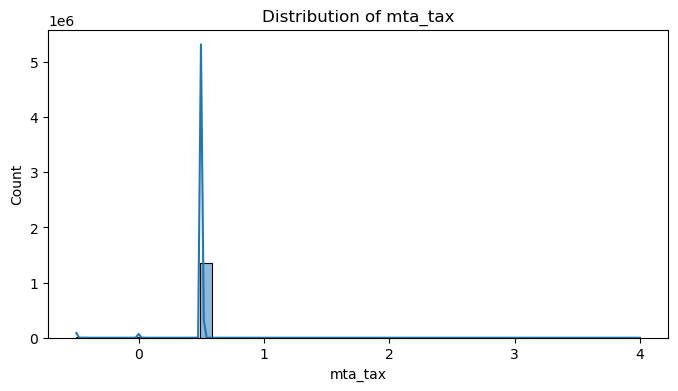

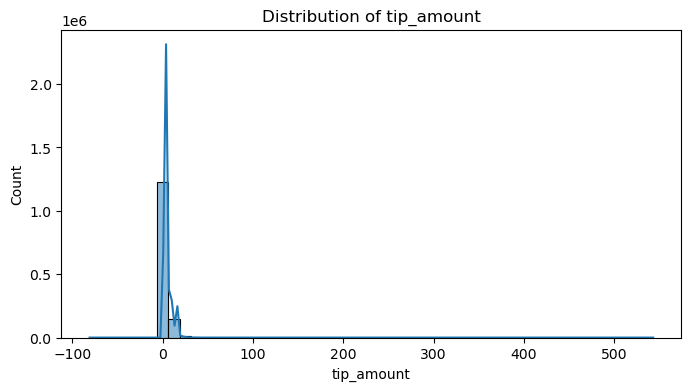

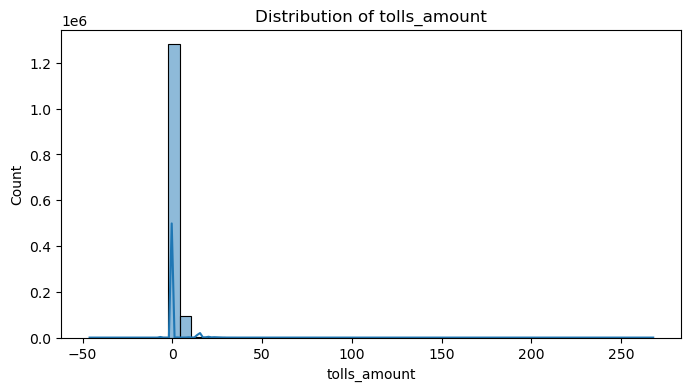

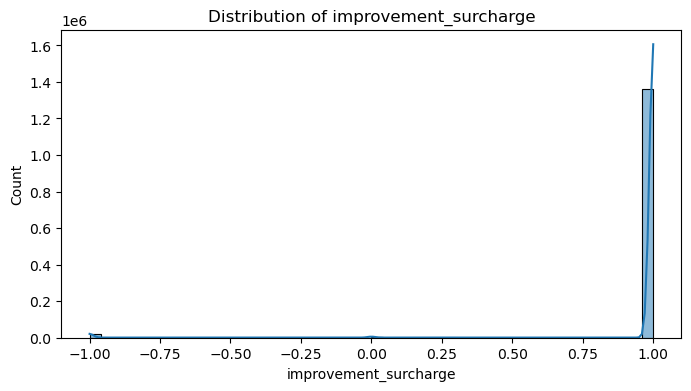

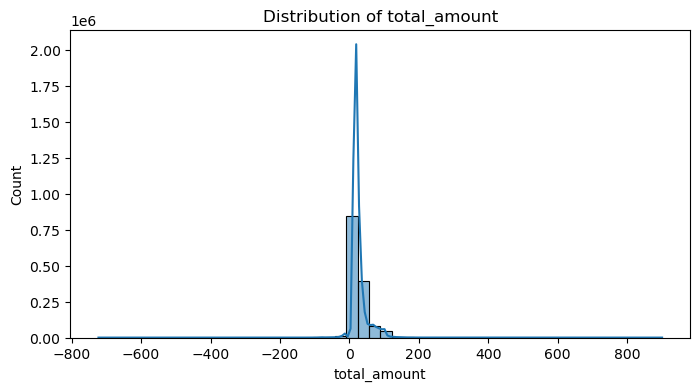

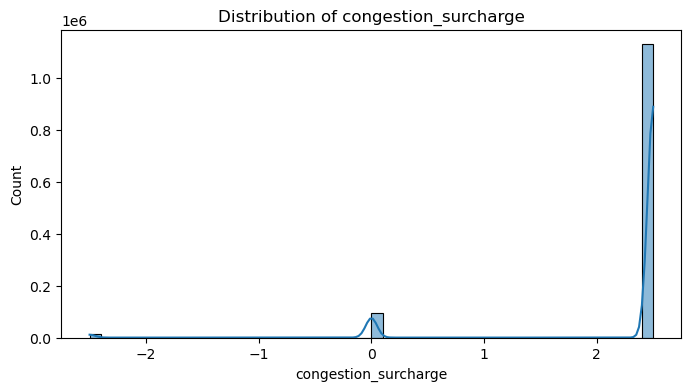

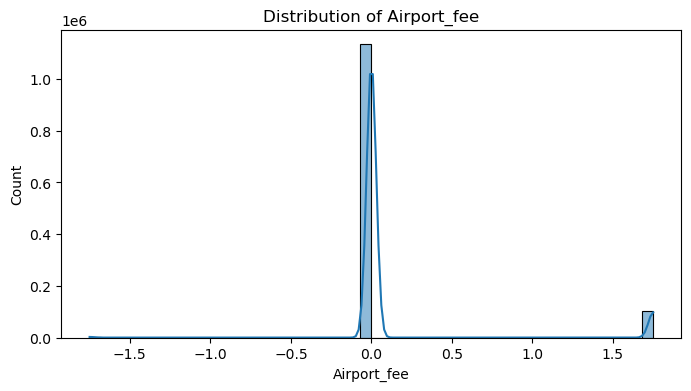

In [11]:
# Plot distributions of numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_sample[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

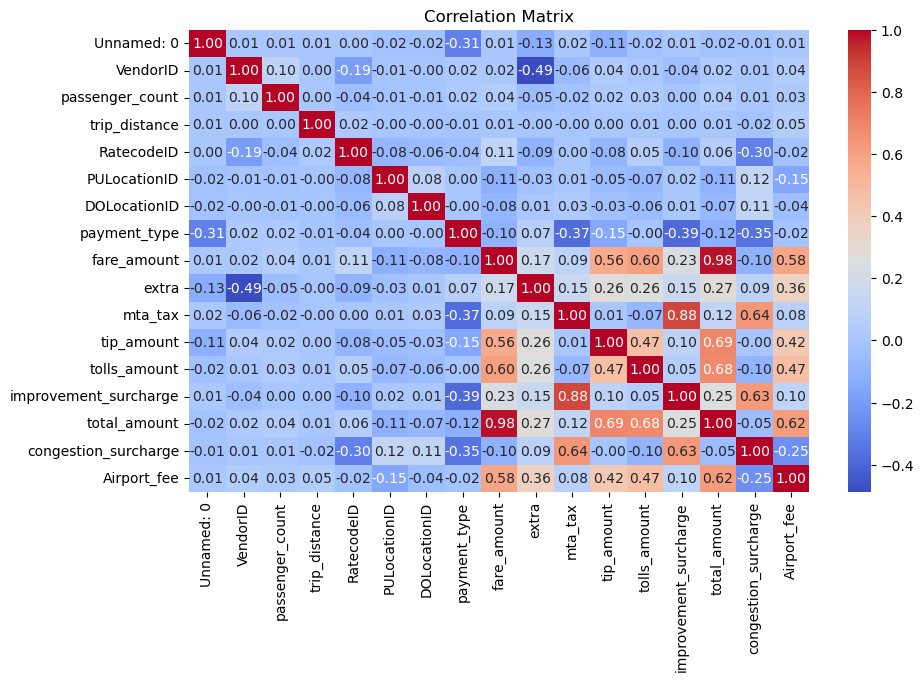

In [12]:
# Correlation matrix (only numerical columns)
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_sample[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()
else:
    print("\nNot enough numerical columns for correlation analysis.")